This python code is used to plot the seasonal cycle of land and near-surface variables

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from netCDF4 import Dataset, MFDataset
import matplotlib.pyplot as plt
import glob
from datetime import datetime, timedelta
from scipy import stats
from sklearn.metrics import mean_squared_error
import shutil
from scipy.spatial import distance
import metpy

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import sys, os, time, warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore')

Loading GloSea5 & GloSea6 data

In [4]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
    
    if yr == 0:
        time  = data1.time
        ta10_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta10_g6 = xr.concat([ta10_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ta11_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta11_g6 = xr.concat([ta11_g6, data1], "year")
        
    del data1

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ta12_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta12_g6 = xr.concat([ta12_g6, data1], "year")
        
    del data1
    
# sys.exit()
vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb6_t2m/19940101_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta01_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta01_g6 = xr.concat([ta01_g6, data1], "year")
        
    del data1
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb6_t2m/19940201_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta02_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta02_g6 = xr.concat([ta02_g6, data1], "year")
        
    del data1
    
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb6_t2m/19940301_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta03_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta03_g6 = xr.concat([ta03_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb6_t2m/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb6_t2m/19940401_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta04_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta04_g6 = xr.concat([ta04_g6, data1], "year")
        
    del data1
    

In [5]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ta10_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta10_g5 = xr.concat([ta10_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ta11_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta11_g5 = xr.concat([ta11_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ta12_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta12_g5 = xr.concat([ta12_g5, data1], "year")
        
    del data1


        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb6_t2m/19940101_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta01_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta01_g5 = xr.concat([ta01_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb6_t2m/19940201_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta02_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta02_g5 = xr.concat([ta02_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb6_t2m/19940301_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta03_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta03_g5 = xr.concat([ta03_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb6_t2m/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(ht=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb6_t2m/19940401_001_apb_6.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ta04_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ta04_g5 = xr.concat([ta04_g5, data1], "year")
        
    del data1
        

In [6]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
    
    if yr == 0:
        time  = data1.time
        ts10_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts10_g6 = xr.concat([ts10_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ts11_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts11_g6 = xr.concat([ts11_g6, data1], "year")
        
    del data1

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ts12_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts12_g6 = xr.concat([ts12_g6, data1], "year")
        
    del data1
    
# sys.exit()
vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb20_ts/19940101_001_apb_19.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts01_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts01_g6 = xr.concat([ts01_g6, data1], "year")
        
    del data1
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb20_ts/19940201_001_apb_19.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts02_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts02_g6 = xr.concat([ts02_g6, data1], "year")
        
    del data1
    
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb20_ts/19940301_001_apb_19.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts03_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts03_g6 = xr.concat([ts03_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb20_ts/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb20_ts/19940401_001_apb_20.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts04_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts04_g6 = xr.concat([ts04_g6, data1], "year")
        
    del data1
    

In [7]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ts10_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts10_g5 = xr.concat([ts10_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ts11_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts11_g5 = xr.concat([ts11_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        ts12_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts12_g5 = xr.concat([ts12_g5, data1], "year")
        
    del data1


        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb18_ts/19940101_001_apb_18.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts01_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts01_g5 = xr.concat([ts01_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb18_ts/19940201_001_apb_18.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts02_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts02_g5 = xr.concat([ts02_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb18_ts/19940301_001_apb_18.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts03_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts03_g5 = xr.concat([ts03_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb18_ts/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb18_ts/19940401_001_apb_18.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        ts04_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        ts04_g5 = xr.concat([ts04_g5, data1], "year")
        
    del data1
        

In [8]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sn10_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn10_g6 = xr.concat([sn10_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sn11_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn11_g6 = xr.concat([sn11_g6, data1], "year")
        
    del data1

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sn12_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn12_g6 = xr.concat([sn12_g6, data1], "year")
        
    del data1
    
# sys.exit()
vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb14_snow/19940101_001_apb_14.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn01_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn01_g6 = xr.concat([sn01_g6, data1], "year")
        
    del data1
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb14_snow/19940201_001_apb_14.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn02_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn02_g6 = xr.concat([sn02_g6, data1], "year")
        
    del data1
    
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb14_snow/19940301_001_apb_14.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn03_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn03_g6 = xr.concat([sn03_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb14_snow/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb14_snow/19940401_001_apb_14.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn04_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn04_g6 = xr.concat([sn04_g6, data1], "year")
        
    del data1
    

In [9]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sn10_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn10_g5 = xr.concat([sn10_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sn11_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn11_g5 = xr.concat([sn11_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sn12_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn12_g5 = xr.concat([sn12_g5, data1], "year")
        
    del data1


        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb17_snow/19940101_001_apb_17.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn01_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn01_g5 = xr.concat([sn01_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb17_snow/19940201_001_apb_17.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn02_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn02_g5 = xr.concat([sn02_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb17_snow/19940301_001_apb_17.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn03_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn03_g5 = xr.concat([sn03_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb17_snow/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(surface=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb17_snow/19940401_001_apb_17.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sn04_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sn04_g5 = xr.concat([sn04_g5, data1], "year")
        
    del data1
        

In [10]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sm10_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm10_g6 = xr.concat([sm10_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sm11_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm11_g6 = xr.concat([sm11_g6, data1], "year")
        
    del data1

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sm12_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm12_g6 = xr.concat([sm12_g6, data1], "year")
        
    del data1
    
# sys.exit()
vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb15_sm/19940101_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm01_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm01_g6 = xr.concat([sm01_g6, data1], "year")
        
    del data1
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb15_sm/19940201_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm02_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm02_g6 = xr.concat([sm02_g6, data1], "year")
        
    del data1
    
    

vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb15_sm/19940301_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm03_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm03_g6 = xr.concat([sm03_g6, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G6/apb15_sm/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask6) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G6/apb15_sm/19940401_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm04_g6 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm04_g6 = xr.concat([sm04_g6, data1], "year")
        
    del data1
    

In [11]:
mask6 = xr.open_dataset('/land1/GloSea/G6/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
mask5 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']

vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*1001_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sm10_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm10_g5 = xr.concat([sm10_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*1101_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sm11_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm11_g5 = xr.concat([sm11_g5, data1], "year")
        
    del data1


vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*1201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time  = data1.time
        sm12_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm12_g5 = xr.concat([sm12_g5, data1], "year")
        
    del data1


        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*0101_001_*.nc'))
for yr,vfile in enumerate(vfile1[2:]):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb15_sm/19940101_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm01_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm01_g5 = xr.concat([sm01_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*0201_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb15_sm/19940201_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm02_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm02_g5 = xr.concat([sm02_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*0301_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb15_sm/19940301_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm03_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm03_g5 = xr.concat([sm03_g5, data1], "year")
        
    del data1
        
        
vfile1 = sorted(glob.glob('/land1/GloSea/G5/apb15_sm/*0401_001_*.nc'))
for yr,vfile in enumerate(vfile1):
    data1 = xr.open_dataset(vfile).isel(level6=0).where( ~np.isnan(mask5) )
    data1 = data1.rename({'t': 'time', 'longitude': 'lon', 'latitude': 'lat'})
    data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
    data1 = data1.sortby(data1.lon).sel(lat=slice(40,60))
        
    if yr == 0:
        time = xr.open_dataset('/land1/GloSea/G5/apb15_sm/19940401_001_apb_15.nc').rename({'t': 'time'})['time']
        data1 = data1.assign_coords({"time": (time)})
        sm04_g5 = data1
    else:
        data1 = data1.assign_coords({"time": (time)})
        sm04_g5 = xr.concat([sm04_g5, data1], "year")
        
    del data1
        

In [12]:
# making yearly averaged climatology of temperature
ts10_g5_ym = ts10_g5.mean(dim='year')
ts11_g5_ym = ts11_g5.mean(dim='year')
ts12_g5_ym = ts12_g5.mean(dim='year')
ts01_g5_ym = ts01_g5.mean(dim='year')
ts02_g5_ym = ts02_g5.mean(dim='year')
ts03_g5_ym = ts03_g5.mean(dim='year')
ts04_g5_ym = ts04_g5.mean(dim='year')
del ts10_g5,ts11_g5,ts12_g5,ts01_g5,ts02_g5,ts03_g5,ts04_g5

ts10_g6_ym = ts10_g6.mean(dim='year')
ts11_g6_ym = ts11_g6.mean(dim='year')
ts12_g6_ym = ts12_g6.mean(dim='year')
ts01_g6_ym = ts01_g6.mean(dim='year')
ts02_g6_ym = ts02_g6.mean(dim='year')
ts03_g6_ym = ts03_g6.mean(dim='year')
ts04_g6_ym = ts04_g6.mean(dim='year')
del ts10_g6,ts11_g6,ts12_g6,ts01_g6,ts02_g6,ts03_g6,ts04_g6

In [13]:
# making yearly averaged climatology of snow
sn10_g5_ym = sn10_g5.mean(dim='year')
sn11_g5_ym = sn11_g5.mean(dim='year')
sn12_g5_ym = sn12_g5.mean(dim='year')
sn01_g5_ym = sn01_g5.mean(dim='year')
sn02_g5_ym = sn02_g5.mean(dim='year')
sn03_g5_ym = sn03_g5.mean(dim='year')
sn04_g5_ym = sn04_g5.mean(dim='year')
del sn10_g5,sn11_g5,sn12_g5,sn01_g5,sn02_g5,sn03_g5,sn04_g5

sn10_g6_ym = sn10_g6.mean(dim='year')
sn11_g6_ym = sn11_g6.mean(dim='year')
sn12_g6_ym = sn12_g6.mean(dim='year')
sn01_g6_ym = sn01_g6.mean(dim='year')
sn02_g6_ym = sn02_g6.mean(dim='year')
sn03_g6_ym = sn03_g6.mean(dim='year')
sn04_g6_ym = sn04_g6.mean(dim='year')
del sn10_g6,sn11_g6,sn12_g6,sn01_g6,sn02_g6,sn03_g6,sn04_g6

In [14]:
# making yearly averaged climatology of surface soil moisture
sm10_g5_ym = sm10_g5.mean(dim='year')
sm11_g5_ym = sm11_g5.mean(dim='year')
sm12_g5_ym = sm12_g5.mean(dim='year')
sm01_g5_ym = sm01_g5.mean(dim='year')
sm02_g5_ym = sm02_g5.mean(dim='year')
sm03_g5_ym = sm03_g5.mean(dim='year')
sm04_g5_ym = sm04_g5.mean(dim='year')
del sm10_g5,sm11_g5,sm12_g5,sm01_g5,sm02_g5,sm03_g5,sm04_g5

sm10_g6_ym = sm10_g6.mean(dim='year')
sm11_g6_ym = sm11_g6.mean(dim='year')
sm12_g6_ym = sm12_g6.mean(dim='year')
sm01_g6_ym = sm01_g6.mean(dim='year')
sm02_g6_ym = sm02_g6.mean(dim='year')
sm03_g6_ym = sm03_g6.mean(dim='year')
sm04_g6_ym = sm04_g6.mean(dim='year')
del sm10_g6,sm11_g6,sm12_g6,sm01_g6,sm02_g6,sm03_g6,sm04_g6

In [20]:
ds_out = xr.Dataset({"lat": (["lat"], sm01_g5_ym.lat.values), "lon": (["lon"], sm01_g5_ym.lon.values), })
data1 = xr.open_dataset('/land1/GloSea/G5/apb15_sm/20021001_001_apb_15.nc').isel(level6=0,t=0)['sm']
data1 = data1.rename({'longitude': 'lon', 'latitude': 'lat'})
data1.coords['lon'] = (data1.coords['lon'] + 180) % 360 - 180
mask = data1.sortby(data1.lon).sel(lat=slice(40,60))

In [61]:
import xesmf as xe

syear = 1993
eyear = 2016
years = [x for x in range(syear,eyear+1)]

vfile = sorted(glob.glob('/land2/ERA5_land/daily/1993/*_snowc.nc'))
time = xr.open_mfdataset(vfile[2:6], concat_dim='time', combine='nested')['time']
del vfile


for yr,year in enumerate(years):
    vfile = sorted(glob.glob('/land2/ERA5_land/daily/'+str(year)+'/*_snowc.nc'))
    vid = vfile.index('/land2/ERA5_land/daily/'+str(year)+'/'+str(year)+'03_snowc.nc')
    # vfile = sorted(glob.glob('/land2/ERA5_land/daily/*/*_snowc.nc'))
    # vid = vfile.index('/land2/ERA5_land/daily/'+str(year)+'/'+str(year)+'10_snowc.nc')
    # print(vfile[vid:vid+4])
    # sys.exit()
    data1 = xr.open_mfdataset(vfile[vid:vid+4], concat_dim='time', combine='nested')['snowc']
    data1 = data1.rename({'longitude': 'lon', 'latitude': 'lat'})
    data1 = data1.reindex(lat=data1.lat[::-1]).sel(lat=slice(40,60)).sel(time=~((data1.time.dt.month == 2) & (data1.time.dt.day == 29)))
    # sys.exit()
    data1 = data1.assign_coords({"time": (time)})
    
    if yr == 0:
        # time  = data1.time
        regridder = xe.Regridder(data1, ds_out, "bilinear")
        sn_obs = regridder(data1).where( ~np.isnan(mask) )
    else:
        # data1 = data1.assign_coords({"time": (time)})
        sn_obs = xr.concat([sn_obs, regridder(data1).where( ~np.isnan(mask) )], "year")
    del data1

sn_obs_ym = sn_obs.mean(dim='year')
del sn_obs

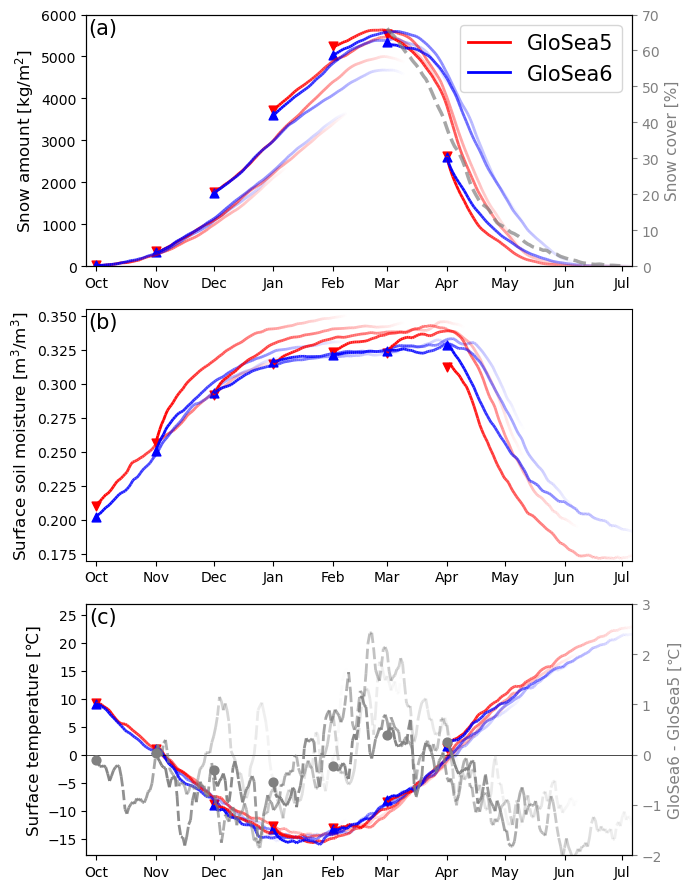

In [108]:
import string
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
alphabet = list(string.ascii_lowercase)

nrows = 3
ncols = 1
llabels = ['Snow amount [kg/m$^2$]','Surface soil moisture [m$^3$/m$^3$]','Surface temperature [℃]']
fname='./fig/seasonal_cycle.png'

fade = colors.to_rgb("red") + (0.0,)
myred = colors.LinearSegmentedColormap.from_list('my',[fade, "red"])
fade = colors.to_rgb("blue") + (0.0,)
myblue = colors.LinearSegmentedColormap.from_list('my',[fade, "blue"])
fade = colors.to_rgb("gray") + (0.0,)
mygray = colors.LinearSegmentedColormap.from_list('my',[fade, "gray"])

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        figsize=(7,9))

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for pp in range(nrows*ncols):
    
    if pp==0:
        
        g5_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        g6_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        
        axs2 = axs[pp].twinx()
        a1 = sn_obs_ym.sel(lon=slice(0,130),lat=slice(45,55)).mean(dim=('lat','lon'))
        axs2.plot(range(31+30+31+31+28,31+30+31+31+28+len(a1.time)),a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        # axs2.plot(range(len(a1.time)),a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        axs2.tick_params(axis='y', colors='gray')
        axs2.set_ylabel('Snow cover [%]', color='gray', fontsize=11)
        # sys.exit()
        
        a1 = sn10_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn10_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[0] = a1[0]
        g6_p[0] = b1[0]
                
        alphas = np.linspace(0.4,1, len(a1.time))[::-1]
        points = np.vstack((range(len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc5 = LineCollection(segments, array=alphas, cmap=myred, lw=2, label='GloSea5')
        axs[pp].add_collection(lc5)
        # lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        # axs[pp].add_collection(lc)
        
        points = np.vstack((range(len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc6 = LineCollection(segments, array=alphas, cmap=myblue, lw=2, label='GloSea6')
        axs[pp].add_collection(lc6)
        # lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        # axs[pp].add_collection(lc)
        
        a1 = sn11_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn11_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[1] = a1[0]
        g6_p[1] = b1[0]
        
        points = np.vstack((range(31,31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31,31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sn12_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn12_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[2] = a1[0]
        g6_p[2] = b1[0]
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].autoscale()
        # sys.exit()
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sn01_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn01_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[3] = a1[0]
        g6_p[3] = b1[0]
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sn02_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn02_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[4] = a1[0]
        g6_p[4] = b1[0]
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sn03_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn03_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[5] = a1[0]
        g6_p[5] = b1[0]
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sn04_g5_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        b1 = sn04_g6_ym['snowdepth'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon'))
        g5_p[6] = a1[0]
        g6_p[6] = b1[0]
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].autoscale()
        axs[pp].set_ylim(0,6000)
        axs2.set_ylim(0,70)
        axs[pp].set_xlim(-5,31+30+31+31+28+31+30+31+30+5)
        
        # axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g5_p, marker='o', s=30, color='red', edgecolor='gray', alpha=0.6)
        # axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g6_p, marker='o', s=30, color='blue', edgecolor='gray', alpha=0.6)
        axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g5_p, marker='v', s=40, color='red')
        axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g6_p, marker='^', s=40, color='blue')
                 
    elif pp==1:
        g5_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        g6_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        
        a1 = sm10_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm10_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[0] = a1[0]
        g6_p[0] = b1[0]
        
        alphas = np.linspace(0.4,1, len(a1.time))[::-1]
        points = np.vstack((range(len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sm11_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm11_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[1] = a1[0]
        g6_p[1] = b1[0]
        
        points = np.vstack((range(31,31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31,31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sm12_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm12_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[2] = a1[0]
        g6_p[2] = b1[0]
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sm01_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm01_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[3] = a1[0]
        g6_p[3] = b1[0]
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sm02_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm02_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[4] = a1[0]
        g6_p[4] = b1[0]
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sm03_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm03_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[5] = a1[0]
        g6_p[5] = b1[0]
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = sm04_g5_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        b1 = sm04_g6_ym['sm'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) / 100.
        g5_p[6] = a1[0]
        g6_p[6] = b1[0]
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        
        # axs[pp].autoscale()
        axs[pp].set_ylim(0.17,0.355)
        axs[pp].set_xlim(-5,31+30+31+31+28+31+30+31+30+5)
        
        axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g5_p, marker='v', s=40, color='red')
        axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g6_p, marker='^', s=40, color='blue')
        
    elif pp==2:
        axs2 = axs[pp].twinx()
        axs2.tick_params(axis='y', colors='gray')
        axs2.set_ylabel('GloSea6 - GloSea5 [℃]', color='gray', fontsize=11)
        
        g5_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        g6_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        diff_p = xr.DataArray(data = np.empty([7]) * np.nan, dims=["init_dates"], coords = dict(init_dates=(["init_dates"], range(7))))
        
        a1 = ts10_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts10_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[0] = a1[0]
        g6_p[0] = b1[0]
        diff_p[0] = b1[0] - a1[0]
        
        alphas = np.linspace(0.5,1, len(a1.time))[::-1]
        points = np.vstack((range(len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        # axs2.plot(range(len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')

        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = ts11_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts11_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[1] = a1[0]
        g6_p[1] = b1[0]
        diff_p[1] = b1[0] - a1[0]
        # axs2.plot(range(31,31+len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        
        points = np.vstack((range(31,31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31,31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31,31+len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        
        
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = ts12_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts12_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[2] = a1[0]
        g6_p[2] = b1[0]
        diff_p[2] = b1[0] - a1[0]
        # axs2.plot(range(31+30,31+30+len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30,31+30+len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = ts01_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts01_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[3] = a1[0]
        g6_p[3] = b1[0]
        diff_p[3] = b1[0] - a1[0]
        # axs2.plot(range(31+30+31,31+30+31+len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31,31+30+31+len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = ts02_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts02_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[4] = a1[0]
        g6_p[4] = b1[0]
        diff_p[4] = b1[0] - a1[0]
        # axs2.plot(range(31+30+31+31,31+30+31+31+len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31,31+30+31+31+len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = ts03_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts03_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[5] = a1[0]
        g6_p[5] = b1[0]
        diff_p[5] = b1[0] - a1[0]
        # axs2.plot(range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28,31+30+31+31+28+len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        a1 = ts04_g5_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        b1 = ts04_g6_ym['temp'].sel(lon=slice(0,130),lat=slice(45,55)).isel(time=slice(0,100)).mean(dim=('lat','lon')) - 273.15
        g5_p[6] = a1[0]
        g6_p[6] = b1[0]
        diff_p[6] = b1[0] - a1[0]
        # axs2.plot(range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), b1-a1,color='gray',lw=2.5,alpha=0.7,linestyle='--')
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myred, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), b1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=myblue, lw=2)
        axs[pp].add_collection(lc)
        
        points = np.vstack((range(31+30+31+31+28+31,31+30+31+31+28+31+len(a1.time)), b1-a1)).T.reshape(-1, 1, 2)
        segments = np.hstack((points[:-1], points[1:]))
        lc = LineCollection(segments, array=alphas, cmap=mygray, lw=2, linestyle='--')
        axs2.add_collection(lc)
        # axs[pp].plot(a1.time,a1,color='red',linewidth=2)
        # axs[pp].plot(a1.time,b1,color='blue',linewidth=2)
        
        # axs[pp].autoscale()
        axs2.set_ylim(-2,3)
        axs[pp].set_ylim(-18,27)
        axs[pp].axhline(y=0., color='black', linestyle='-',lw=0.5)
        axs[pp].set_xlim(-5,31+30+31+31+28+31+30+31+30+5)
        
        axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g5_p, marker='v', s=40, color='red')
        axs[pp].scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],g6_p, marker='^', s=40, color='blue')
        axs2.scatter([0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31],diff_p, marker='o', s=40, color='gray')
    
    
    # fmt = mdates.DateFormatter("%Y-%m-%d")
    # fmt = mdates.DateFormatter("%m")
    # fmt = mdates.DateFormatter("%b")
    # axs[pp].xaxis.set_major_formatter(fmt)
    # axs[pp].xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(0, 13, 1), bymonthday=1))

    # axs[pp].set_xticks([datetime(1993, 10, 1), datetime(1993, 11, 1), datetime(1993, 12, 1), 
    #                     datetime(1994,  1, 1), datetime(1994,  2, 1), datetime(1994,  3, 1), 
    #                     datetime(1994,  4, 1), datetime(1994,  5, 1), datetime(1994,  6, 1), 
    #                     datetime(1994,  7, 1)])
    # ax.set_xticks(dts[1::3])
    # sys.exit()


    xaxis = [0,31,31+30,31+30+31,31+30+31+31,31+30+31+31+28,31+30+31+31+28+31,31+30+31+31+28+31+30,31+30+31+31+28+31+30+31,31+30+31+31+28+31+30+31+30]
    axs[pp].set_xticks(xaxis)
    xaxis2 = ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul']
    xaxis3 = [ str(xaxis2[x]) for x in range(len(xaxis)) ]
    axs[pp].set_xticklabels(xaxis3)
    # xaxis2 = ['Oct','Nov','Dec']
    
    
    # if pp==2 or pp==5:
    #     xaxis3 = [ str(xaxis2[x])[5:10] for x in range(len(xaxis)) ]
    #     axs[pp].set_xticklabels(xaxis3,rotation=90)
    # else:
    #     xaxis3 = [ '' for x in range(len(xaxis)) ]
    #     axs[pp].set_xticklabels(xaxis3,rotation=90)
    axs[pp].set_ylabel("{}".format(llabels[pp]), fontsize=12)
    axs[pp].set_title('({})'.format(alphabet[pp]),fontsize=15,y=0.89,x=0.03)
    
    if pp==0:
        # axs[pp].legend(['GloSea5','GloSea6'], labelcolor=['red','blue'])
        from matplotlib.lines import Line2D
        custom_lines = [Line2D([0], [0], color='red', lw=2),
                        Line2D([0], [0], color='blue', lw=2)]
        axs[pp].legend(custom_lines, ['GloSea5','GloSea6'], fontsize=15, loc ="upper right")
        # axs[pp].legend(handles=[lc5, lc6])
    
    # sys.exit()

# Delete the unwanted axes
# fig.delaxes(axs[4])

plt.tight_layout(h_pad=1, w_pad=2)
# plt.suptitle('2010 AMJJAS',y=1.05,fontsize=16)
plt.savefig(fname, dpi=300, bbox_inches = 'tight', pad_inches = 0.02)
plt.show()